# Prototyping the data quality criteria

Ok, this is a take on Q2/Q1/Q0.



In [78]:
%run ../variability_selection.py

In [75]:
spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in zip(wserv_ids, n_obs_list, n_min_list, n_max_list):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)

    print(f"NewER Q0 size: {np.sum(q0)}")
    print(f"NewER Q1 size: {np.sum(q1)}")
    print(f"NewER Q2 size: {np.sum(q2)}")
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    print(f"V0 size: {np.sum(v0)}")
    print(f"V1 size: {np.sum(v1)}")
    print(f"V2 size: {np.sum(v2)}")
    
    


   WSERV1: 

NewER Q0 size: 115858
NewER Q1 size: 66653
NewER Q2 size: 35246
V0 size: 8980
V1 size: 1474
V2 size: 760

   WSERV5: 

NewER Q0 size: 15799
NewER Q1 size: 5375
NewER Q2 size: 3452
V0 size: 4654
V1 size: 1164
V2 size: 649

   WSERV7: 

NewER Q0 size: 11885
NewER Q1 size: 6269
NewER Q2 size: 4756
V0 size: 702
V1 size: 296
V2 size: 196

   WSERV8: 

NewER Q0 size: 15021
NewER Q1 size: 8227
NewER Q2 size: 6253
V0 size: 949
V1 size: 368
V2 size: 258

   WSERV11: 

NewER Q0 size: 21530
NewER Q1 size: 13865
NewER Q2 size: 10533
V0 size: 1779
V1 size: 894
V2 size: 681


In [28]:
sq0_variables

<function __main__.sq0_variables(*args, **kwargs)>

In [60]:
%run ../brown_dwarf_selection.py


   WSERV1: 

Q1 brown dwarf candidates: 24595
Q1 brown dwarf candidates that are variable: 399

   WSERV5: 

Q1 brown dwarf candidates: 3036
Q1 brown dwarf candidates that are variable: 353

   WSERV7: 

Q1 brown dwarf candidates: 4149
Q1 brown dwarf candidates that are variable: 91

   WSERV8: 

Q1 brown dwarf candidates: 5097
Q1 brown dwarf candidates that are variable: 93

   WSERV11: 

Q1 brown dwarf candidates: 5944
Q1 brown dwarf candidates that are variable: 45


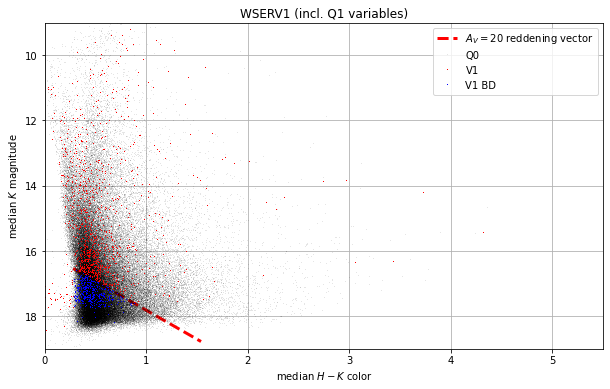

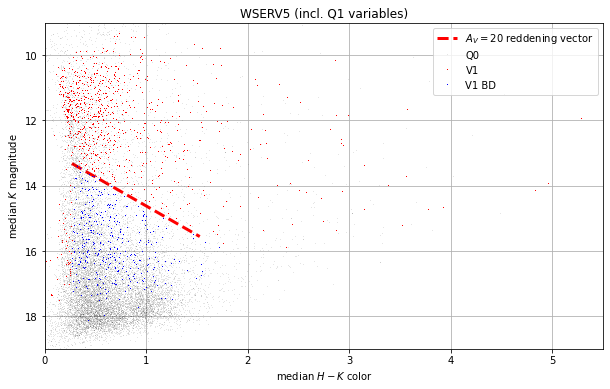

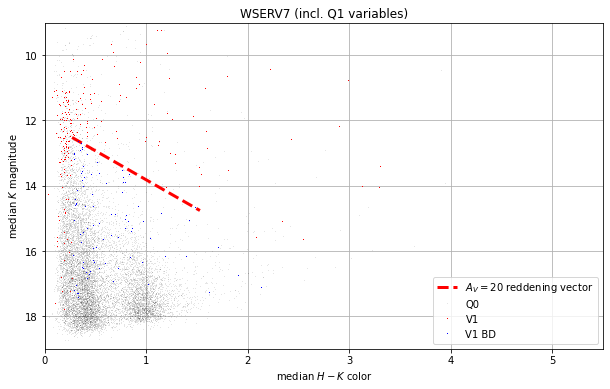

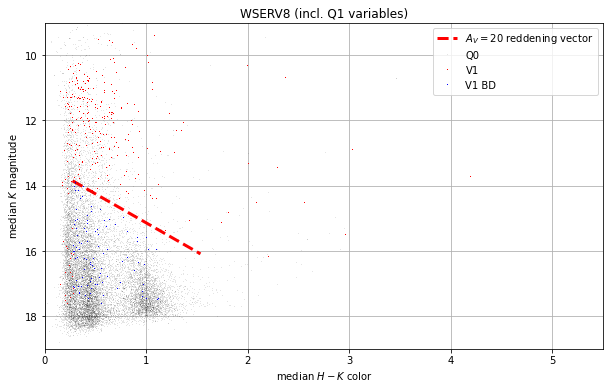

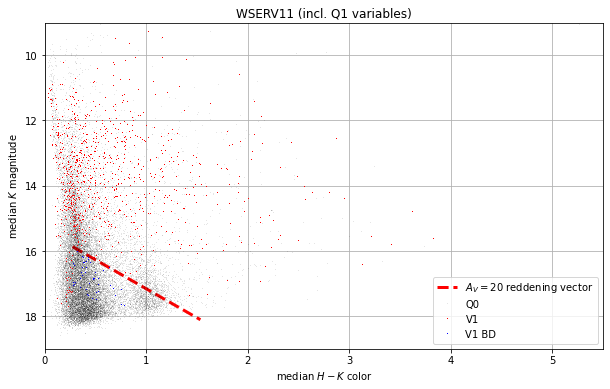

In [76]:
import matplotlib.pyplot as plt
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, ax = plt.subplots(1, figsize=(10,6))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

    ax.plot(
        [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
        [K_BDlimit, K_BDlimit + A_K*20],
        'r--', lw=3,
        label='$A_V=20$ reddening vector'
    )
    ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1, label='Q0')
    ax.plot(hmk[v1], k[v1], 'r,', alpha=1, label='V1')
    ax.plot(hmk[v1&bd], k[v1&bd], 'b,', alpha=1, label='V1 BD')
    
    print(f"Q1 brown dwarf candidates: {np.sum(q1&bd)}")
    print(f"Q1 brown dwarf candidates that are variable: {np.sum(v1&bd)}")
    ax.legend()
    ax.grid(True)
    
    ax.set_xlabel("median $H-K$ color")
    ax.set_ylabel("median $K$ magnitude")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")

    ax.set_xlim(0, 5.5)
    ax.set_ylim(19, 9)
    


   WSERV1: 

Q1 brown dwarf candidates: 24595
Q1 brown dwarf candidates that are variable: 2067

   WSERV5: 

Q1 brown dwarf candidates: 3036
Q1 brown dwarf candidates that are variable: 770

   WSERV7: 

Q1 brown dwarf candidates: 4149
Q1 brown dwarf candidates that are variable: 283

   WSERV8: 

Q1 brown dwarf candidates: 5097
Q1 brown dwarf candidates that are variable: 311

   WSERV11: 

Q1 brown dwarf candidates: 5944
Q1 brown dwarf candidates that are variable: 309


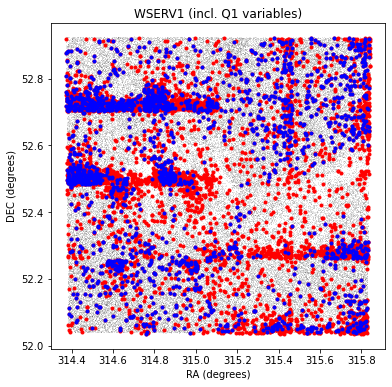

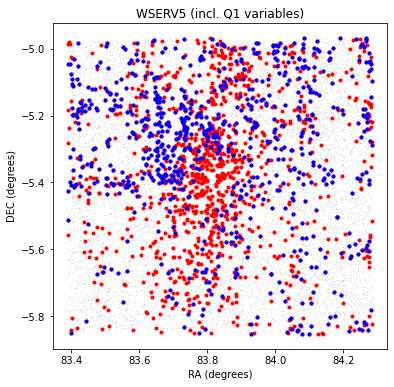

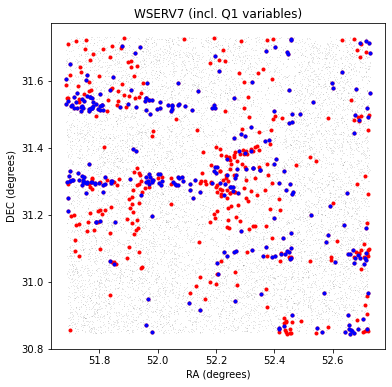

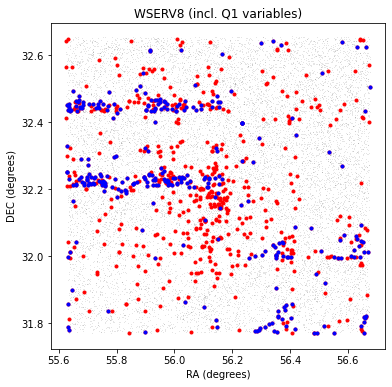

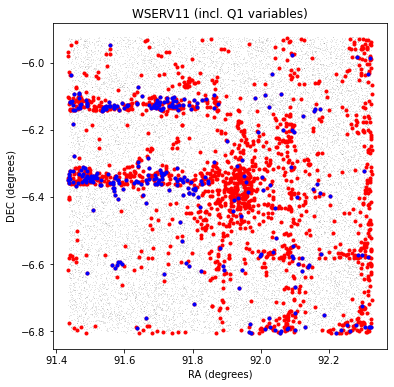

In [79]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, ax = plt.subplots(1, figsize=(6,6))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

#     ax.plot(
#         [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
#         [K_BDlimit, K_BDlimit + A_K*20],
#         'r--', lw=3,
#         label='$A_V=20$ reddening vector'
#     )
#     ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1, label='Q0')
#     ax.plot(hmk[v1], k[v1], 'r,', alpha=1, label='V1')
#     ax.plot(hmk[v1&bd], k[v1&bd], 'b,', alpha=1, label='V1 BD')
    
    ax.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    ax.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.', alpha=1, zorder=5)
    ax.plot(np.degrees(ds[v1&bd]['mean']['RA']), np.degrees(ds[v1&bd]['mean']['DEC']), 'b.', alpha=1, zorder=10)

    print(f"Q1 brown dwarf candidates: {np.sum(q1&bd)}")
    print(f"Q1 brown dwarf candidates that are variable: {np.sum(v1&bd)}")
#     ax.legend()
#     ax.grid(True)
    
    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)

# An activity: bisecting to find the real cutoff

I'm going to do a bisection activity. I have a theory: the weird spatially correlated artifacts are arising because below a certain brightness cutoff, the data become unreliable. I want to find the place where that happens.

## First attempt: cuts at K=17ish
This was a failure.

## Second attempt: separate things by band.
This also has not advanced our cause.





   WSERV1: 

2570
6135
2570
6135
3207
6135
3207
6135
3024
6135
3024
6135




   WSERV5: 

946
1850
946
1850
1123
1850
1123
1850
1184
1850
1184
1850




   WSERV7: 

347
595
347
595
296
595
296
595
299
595
299
595




   WSERV8: 

510
823
510
823
433
823
433
823
441
823
441
823




   WSERV11: 

924
1812
924
1812
1055
1812
1055
1812
1360
1812
1360
1812


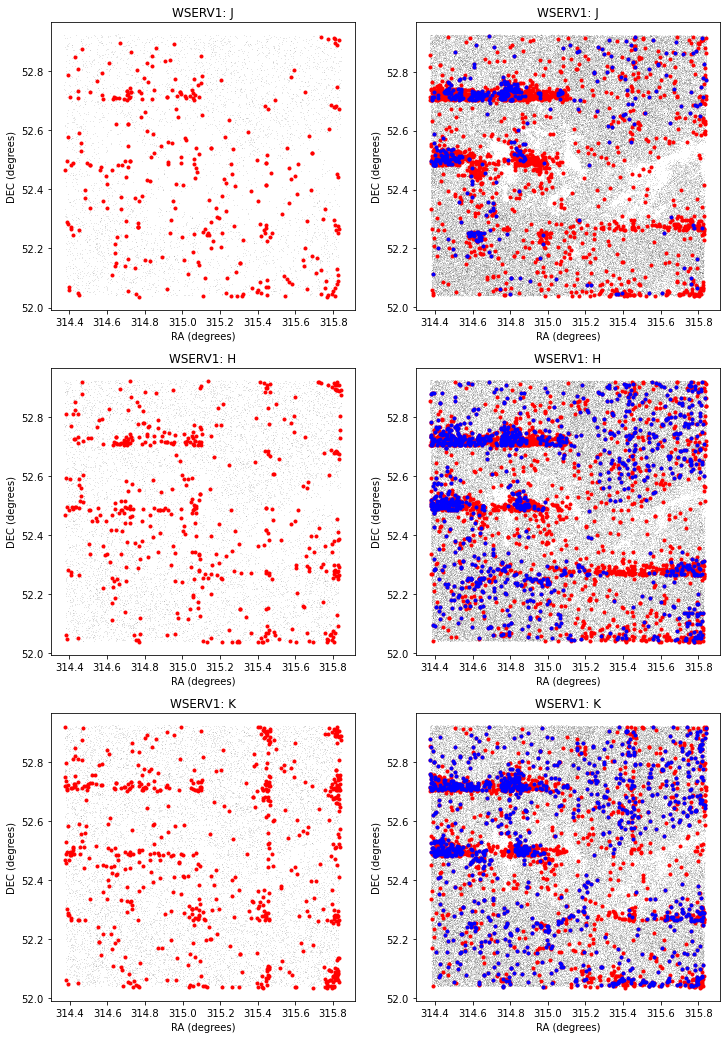

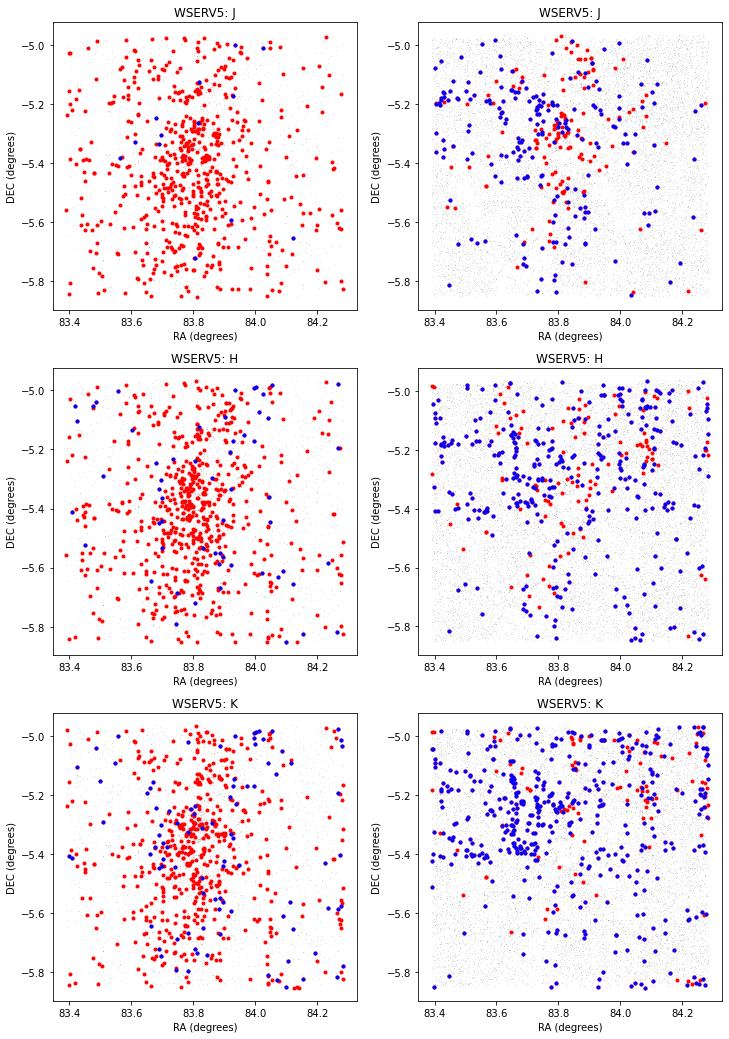

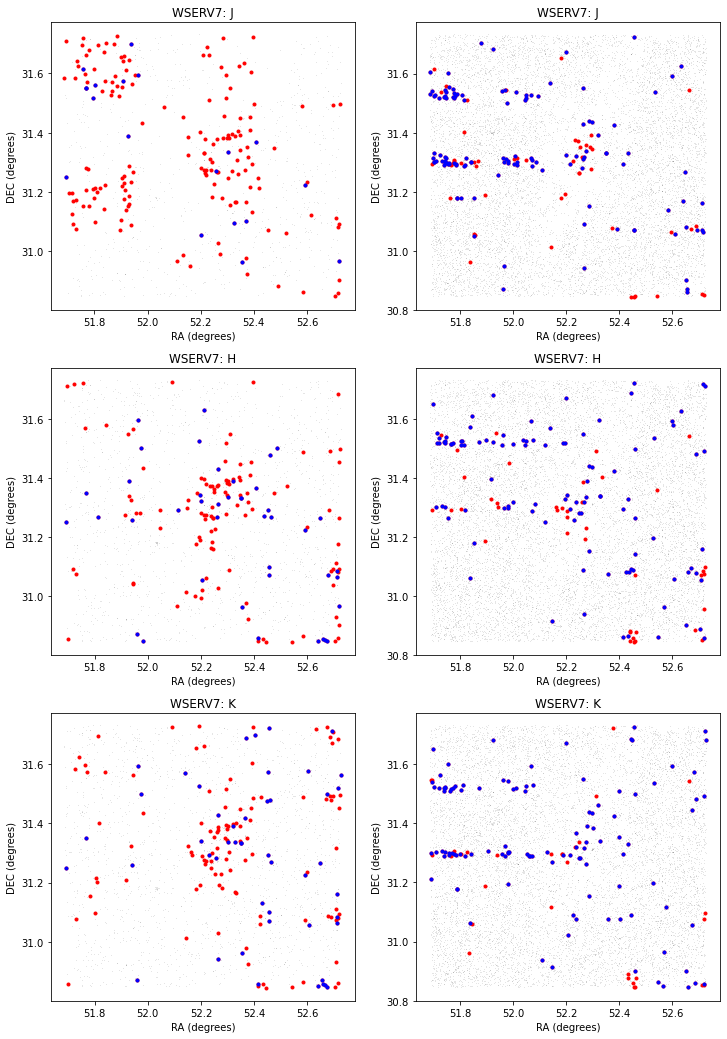

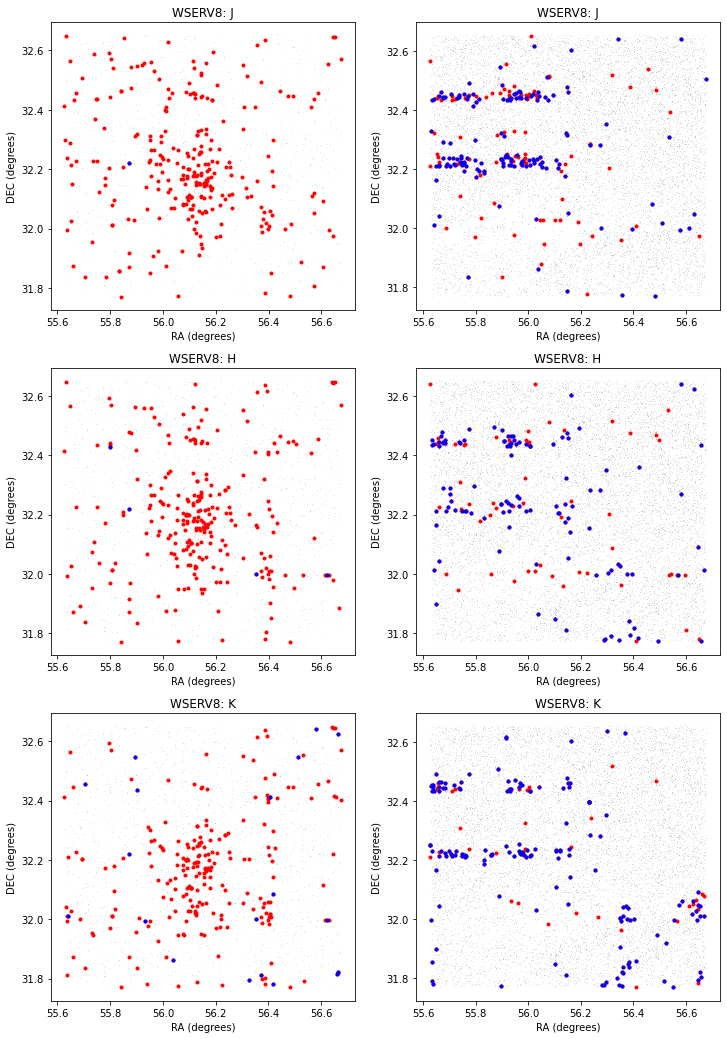

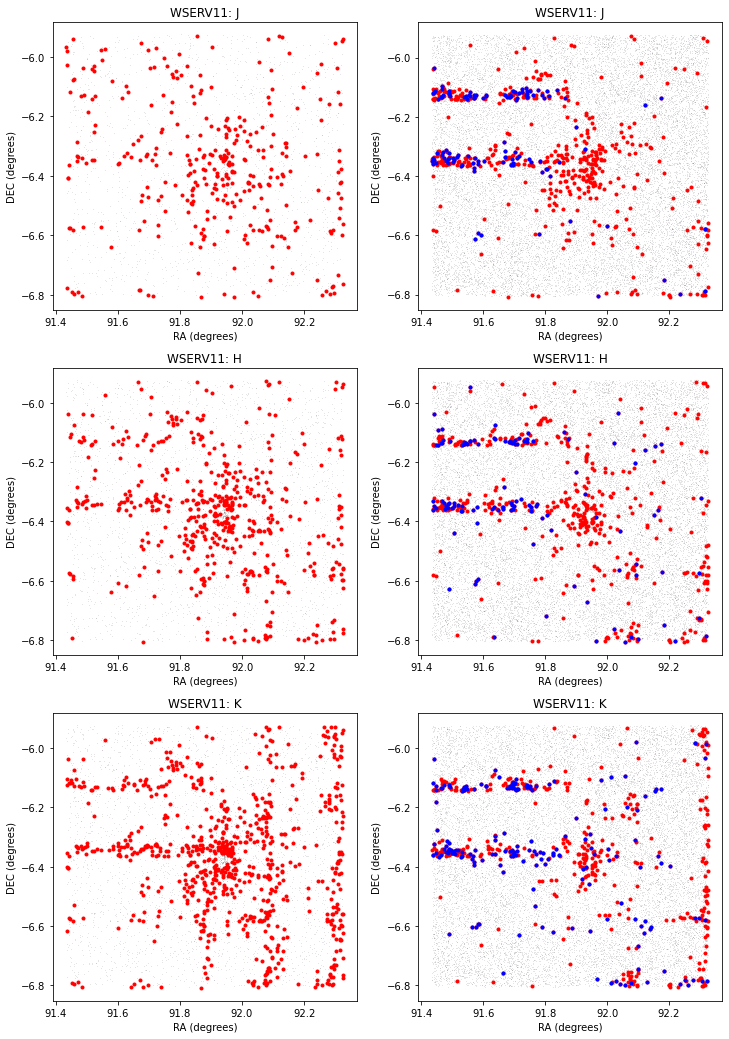

In [100]:
# maps

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n\n\n\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(6*2, 6*3))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

#     left = h < 16
#     right = h >= 16
        
    bands = ["J", "H", "K"]
    
    limits = {"J" : 15, "H": 15, "K": 15}
    v_functions = {"J" : sv_j, "H": sv_h, "K": sv_k}
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    
    for axpair, band in zip(axes, bands):
        
        left = ds['median'][f'{band}APERMAG3'] < limits[band]
        right = ds['median'][f'{band}APERMAG3'] >= limits[band]
        
        sides = (left, right)
        
        for ax, side in zip(axpair, sides):
            
            v_b = v_functions[band](ds) & q_by_band[band]
            
            print(np.sum(v_b))
            print(np.sum(v1))
    
            ax.plot(np.degrees(ds[side&q0]['mean']['RA']), np.degrees(ds[side&q0]['mean']['DEC']), 'k,', alpha=0.1)
            ax.plot(np.degrees(ds[side&v_b]['mean']['RA']), np.degrees(ds[side&v_b]['mean']['DEC']), 'r.', alpha=1, zorder=5)
            ax.plot(np.degrees(ds[side&v_b&bd]['mean']['RA']), np.degrees(ds[side&v_b&bd]['mean']['DEC']), 'b.', alpha=1, zorder=10)

#             print(f"Q1 brown dwarf candidates: {np.sum(side&q1&bd)}")
#             print(f"Q1 brown dwarf candidates that are variable: {np.sum(side&v1&bd)}")
        #     ax.legend()
        #     ax.grid(True)

            ax.set_xlabel("RA (degrees)")
            ax.set_ylabel("DEC (degrees)")
#             ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")
            ax.set_title(f"WSERV{wserv}: {band}")
    
        

    #     ax.set_xlim(0, 5.5)
    #     ax.set_ylim(19, 9)
    





   WSERV1: 





   WSERV5: 





   WSERV7: 





   WSERV8: 





   WSERV11: 



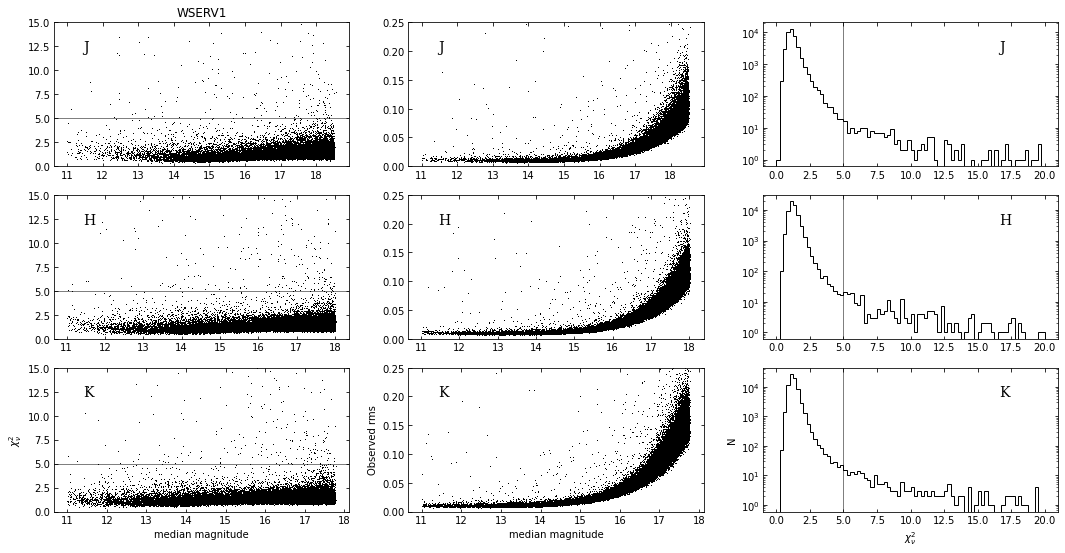

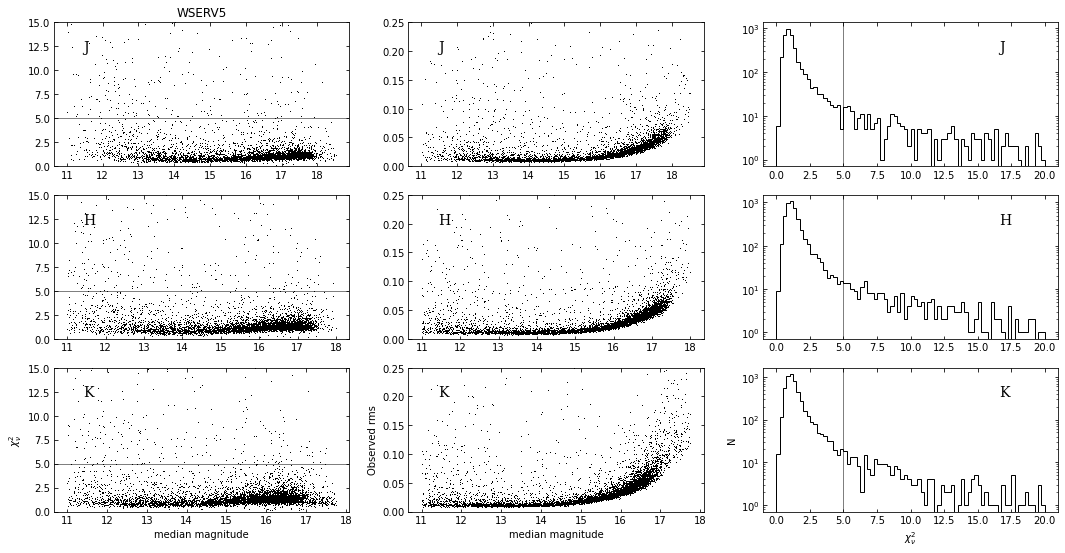

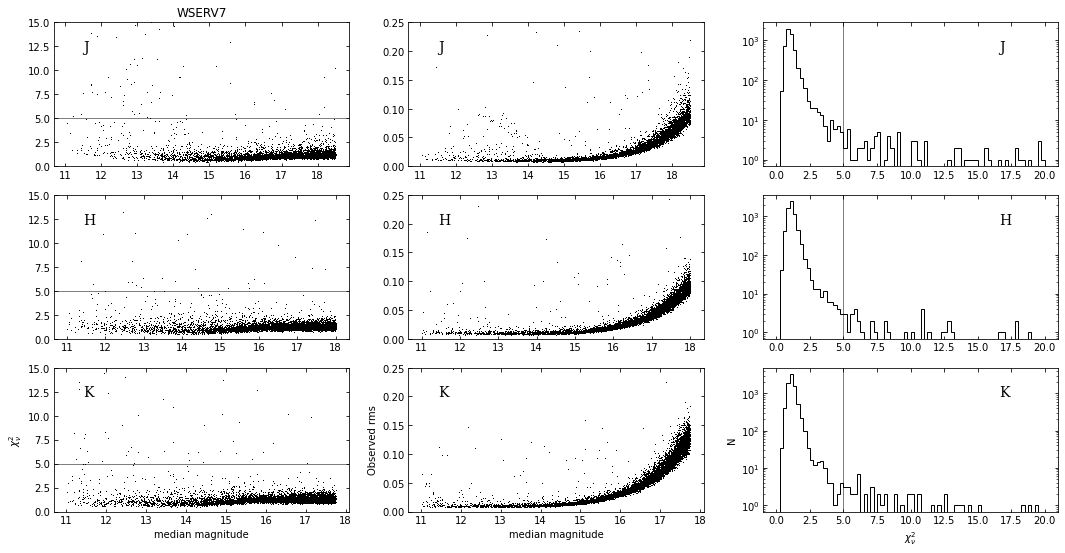

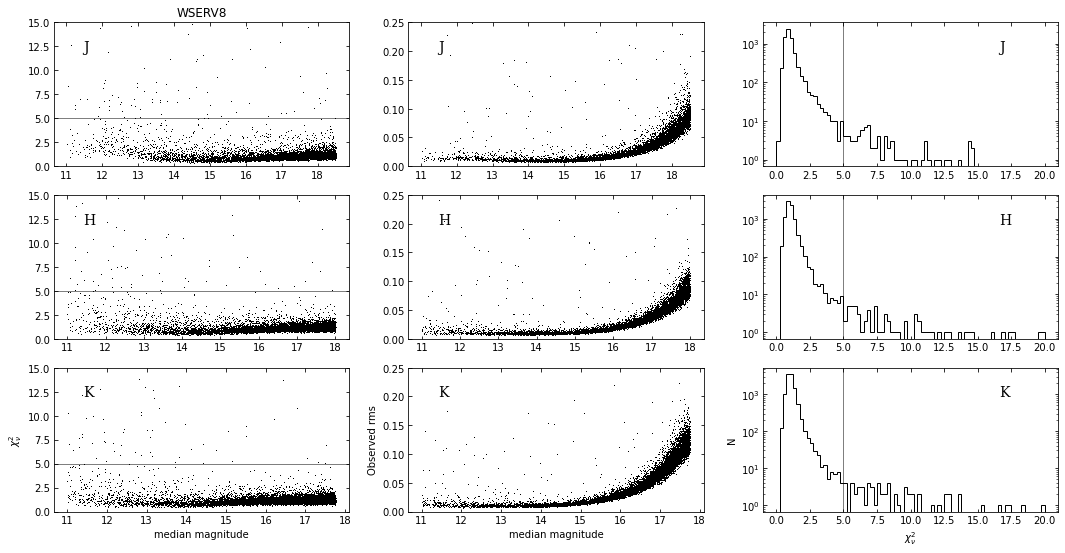

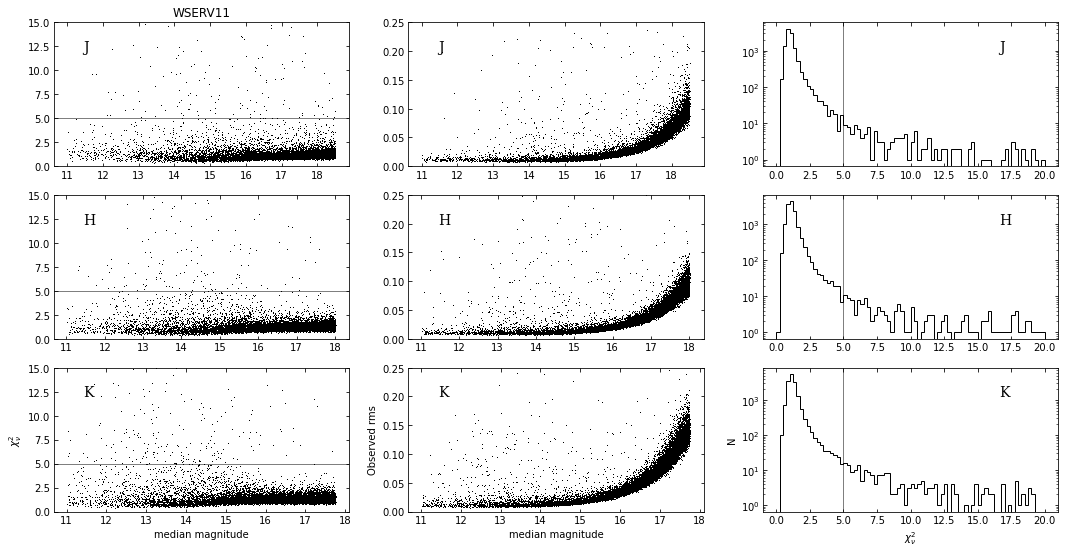

In [138]:
# Thing we need to do:

# plot chisq vs mag, sigma vs mag, and a histogram of chisq values (log y axis)

# maps

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

for wserv, n_obs, n_min, n_max in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list)):
    
    print(f"\n\n\n\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)
    
    bd = simple_BD_select(ds, wserv)

    # rieke & lebofsky 1985 reddening law
    A_K = 0.112
    A_H = 0.175
    E_HK = A_H - A_K # this is like a slope in color-mag space
    
    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]

    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(3*6, 6*3/2))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

        
    bands = ["J", "H", "K"]
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    
    axes[0][0].set_title(f"WSERV{wserv}")
        
    for ax, band in zip(axes, bands):
 
        qb = q_by_band[band]
        ax[0].plot(ds[qb]['median'][f'{band}APERMAG3'], ds[qb]['variability'][f'{band}_red_chisq'], 'k,')
        ax[1].plot(ds[qb]['median'][f'{band}APERMAG3'], ds[qb]['std'][f'{band}APERMAG3'], 'k,')
        
        ax[2].set_yscale('log')
        ax[2].hist(ds[qb]['variability'][f'{band}_red_chisq'], bins=80, range=(0,20), color='k', histtype='step')
        

        ax[0].set_ylim(0, 15)
        ax[1].set_ylim(0, 0.25)
        
        ax[0].text(0.1, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[0].transAxes)
        ax[1].text(0.1, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[1].transAxes)
        ax[2].text(0.8, 0.8, f"{band}", fontsize=14, family='serif', transform=ax[2].transAxes)
        
        ax[0].axhline(5, color='k', lw=1, alpha=0.5)
        ax[2].axvline(5, color='k', lw=1, alpha=0.5)
        

    ax[0].set_ylabel(r"$\chi^2_\nu$")
    ax[0].set_xlabel("median magnitude")

    ax[1].set_ylabel("Observed rms")
    ax[1].set_xlabel("median magnitude")

    ax[2].set_ylabel("N")
    ax[2].set_xlabel(r"$\chi^2_\nu$")


        
